In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F

from sklearn.metrics import confusion_matrix, classification_report
from torchvision.utils import make_grid

from flows.autoregressive import MaskedAutoregressiveFlow
from utils import load_model

FLOW_PATH = 'logs/MAF-all/version_0/'
MODEL_PATH = 'logs/DFCVAE/version_0/'
DATA_PATH = 'logs/DFCVAE/version_0/latent_space'

In [2]:
flow = load_model(FLOW_PATH).cuda()
model = load_model(MODEL_PATH, 'vae').cuda()

In [3]:
def show_image(image):
    plt.figure(figsize = (16, 8))
    plt.imshow(image.squeeze(0).permute(1, 2, 0).detach().cpu())
    plt.show()

In [4]:
z_train = pd.read_csv(f'{DATA_PATH}/z_train.csv')
y_train = pd.read_csv(f'{DATA_PATH}/y_train.csv')

z_valid = pd.read_csv(f'{DATA_PATH}/z_valid.csv')
y_valid = pd.read_csv(f'{DATA_PATH}/y_valid.csv')

z_test = pd.read_csv(f'{DATA_PATH}/z_test.csv')
y_test = pd.read_csv(f'{DATA_PATH}/y_test.csv')

## Image

In [5]:
n_samples = 20
n_row = 5

y0 = torch.zeros(1, 40).cuda()
y1 = torch.ones(1, 40).cuda()

with torch.no_grad():
    res0 = flow.sample(n_samples, y0)
    res1 = flow.sample(n_samples, y1)

res0_image = model.decode(res0)
res1_image = model.decode(res1)

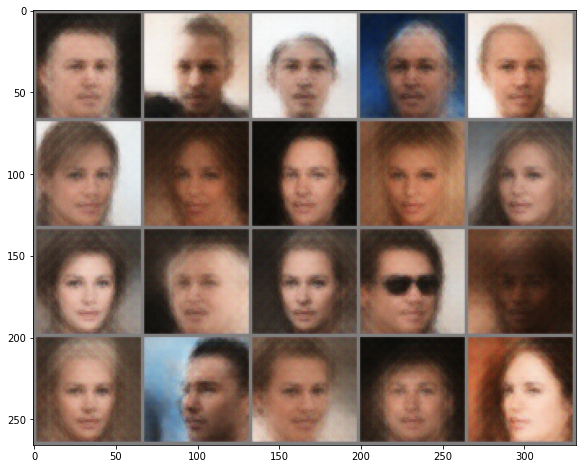

In [6]:
show_image((make_grid(res0_image, nrow = n_row) + 1) / 2)

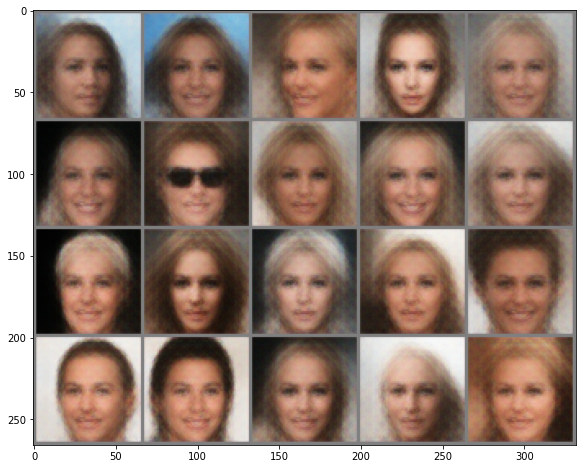

In [7]:
show_image((make_grid(res1_image, nrow = n_row) + 1) / 2)